# -----------------------------------Basic Financial Analysis-----------------------------------

## Our Main Questions

1. Studying the trends between Crude Oil and Airlines with side computations using moving averages. 
2. Understanding the relationship between different sectored-stocks using Correlation Coefficients.

## Introduction

I am currently managing a portfolio with some industry professionals. I thought an interesting topic would be stock analysis using **Pandas** and **Datareader**

In [51]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [52]:
import pandas as pd
import io

## Importing Data

There are **alot** of methods to import Stock Data, however the **quickest** one I found was the following method:

*Example 1*

In [53]:
from pandas.io.data import DataReader as dr
from datetime import datetime

tesla_motors = dr('TSLA',  'yahoo', datetime(2004,4,1), datetime(2016,1,3))
tesla_motors.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-12-24,230.559998,231.880005,228.279999,230.570007,708000,230.570007
2015-12-28,231.490005,231.979996,225.539993,228.949997,1901300,228.949997
2015-12-29,230.059998,237.720001,229.550003,237.190002,2406300,237.190002
2015-12-30,236.600006,243.630005,235.669998,238.089996,3697900,238.089996
2015-12-31,238.509995,243.449997,238.369995,240.009995,2683200,240.009995


In [54]:
tesla_motors.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1388 entries, 2010-06-29 to 2015-12-31
Data columns (total 6 columns):
Open         1388 non-null float64
High         1388 non-null float64
Low          1388 non-null float64
Close        1388 non-null float64
Volume       1388 non-null int64
Adj Close    1388 non-null float64
dtypes: float64(5), int64(1)
memory usage: 75.9 KB


In [55]:
tesla_motors["Open"].head()

Date
2010-06-29    19.000000
2010-06-30    25.790001
2010-07-01    25.000000
2010-07-02    23.000000
2010-07-06    20.000000
Name: Open, dtype: float64

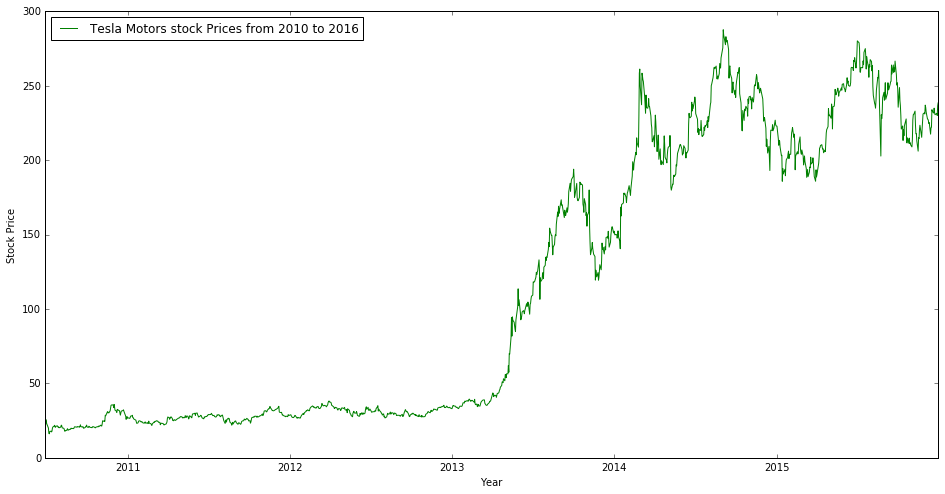

In [56]:
plt.figure(figsize = (16,8))
plt.plot(tesla_motors["Open"], "g")
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.legend(['Tesla Motors stock Prices from 2010 to 2016'], loc='best')
plt.show()

### **1.  Oil, Airlines and their trends in 2015**

**Importing Oil Prices**

In [57]:
crude_oil = dr('USO',  'yahoo', datetime(2015,6,1), datetime(2016,1,1))
crude_oil.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-12-24,11.34,11.35,11.23,11.30,19038100,11.30
2015-12-28,11.06,11.07,10.91,10.93,20495900,10.93
2015-12-29,11.16,11.29,11.15,11.26,23585200,11.26
2015-12-30,10.96,11.00,10.84,10.93,24796400,10.93
2015-12-31,10.84,11.24,10.82,11.00,30362300,11.00


** Plotting this result **

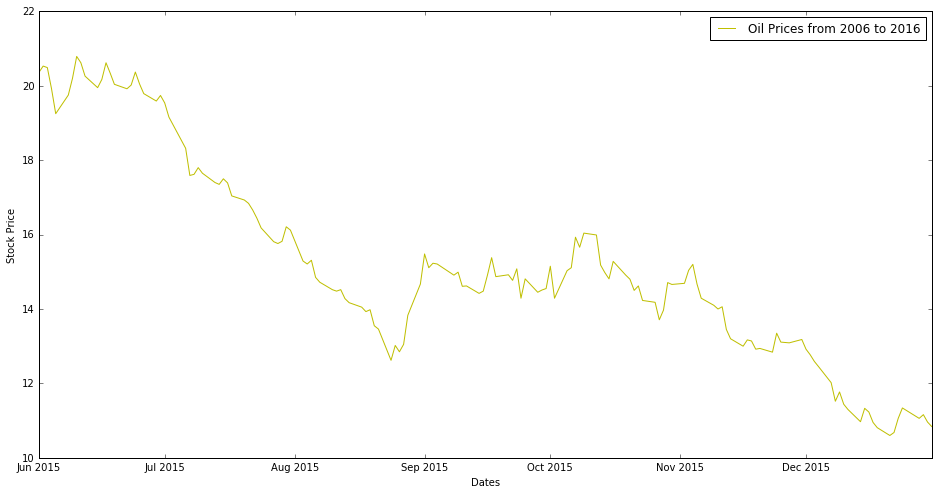

In [58]:
plt.figure(figsize = (16,8))
plt.plot(crude_oil["Open"], 'y')
plt.xlabel('Dates')
plt.ylabel('Stock Price')
plt.legend(['Oil Prices from 2006 to 2016'], loc='best')
plt.show()

** Moving Averages **

In [59]:
close_price = crude_oil["Adj Close"]

In [60]:
m_average = pd.rolling_mean(close_price, 10)
m_average[100]

15.17900010000001

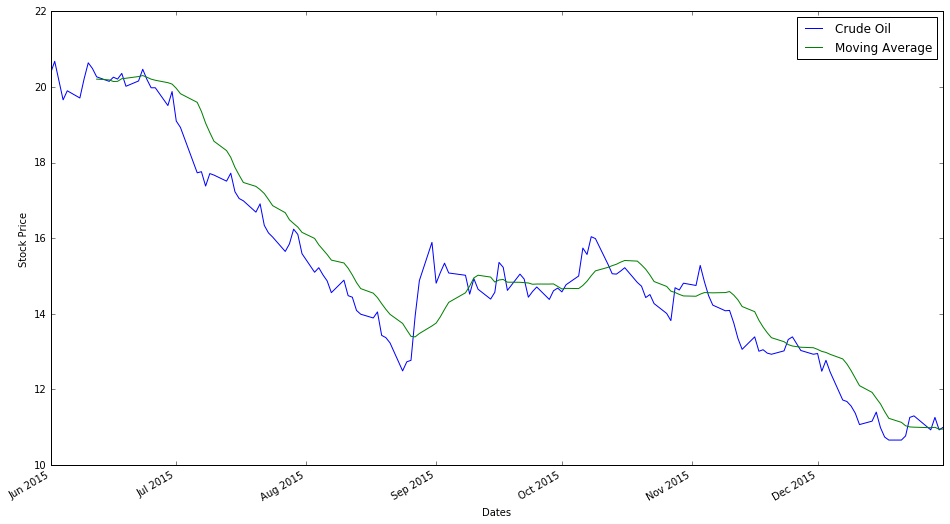

In [61]:
plt.figure(figsize = (16,9))
close_price.plot(label='Crude Oil')
m_average.plot(label='Moving Average')
plt.xlabel('Dates')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

*Why are they important?*

A widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random price fluctuations. A moving average (MA) is a trend-following or lagging indicator because it is based on past prices. The two basic and commonly used MAs are the simple moving average (SMA), which is the simple average of a security over a defined number of time periods, and the exponential moving average (EMA), which gives bigger weight to more recent prices. The most common applications of MAs are to identify the trend direction and to determine support and resistance levels. While MAs are useful enough on their own, they also form the basis for other indicators such as the Moving Average Convergence Divergence (MACD).

Source- Investopedia

**Trends of Airlines**

Now lets look at the example of a few airline companies. In our case we will look at Virgin Airways (VA), American Airlines (AAL), JetBlue (JBLU), Delta Airlines (DAL), and a budget airline - Southwest Airlines (LUV).

Lets call these out first:






In [62]:
jblu = dr('JBLU',  'yahoo', datetime(2015,6,1), datetime(2016,1,1))
dal = dr('dal',  'yahoo', datetime(2015,6,1), datetime(2016,1,1))
va = dr('VA',  'yahoo', datetime(2015,6,1), datetime(2016,1,1))
aal = dr('AAL',  'yahoo', datetime(2015,6,1), datetime(2016,1,1))
luv = dr('LUV',  'yahoo', datetime(2015,6,1), datetime(2016,1,1))


Now lets Plot!

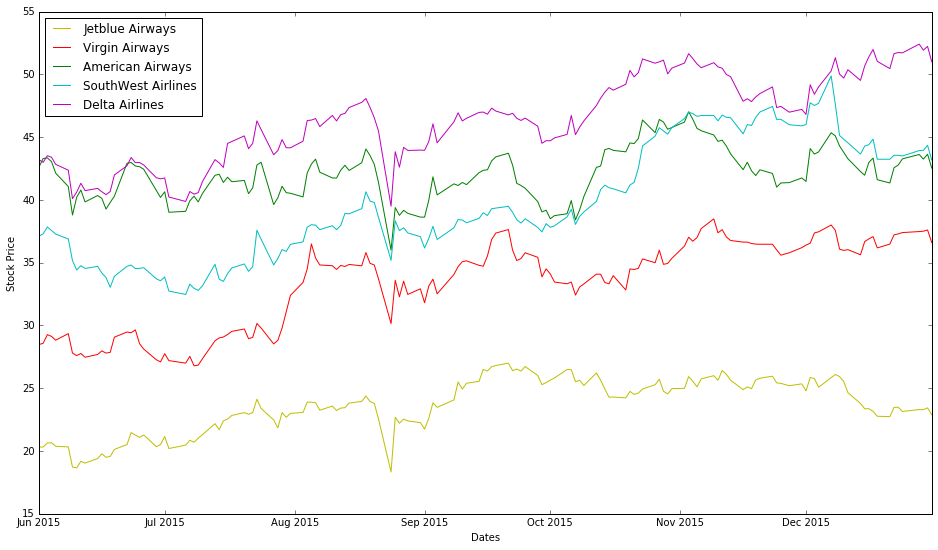

In [63]:
plt.figure(figsize=(16,9))
plt.plot (jblu["Open"], "y", va["Open"], "r", aal["Open"], "g", luv["Open"], "c", dal["Open"], "m")
plt.legend(["Jetblue Airways", "Virgin Airways", "American Airways", "SouthWest Airlines", "Delta Airlines"], loc='best')
plt.xlabel('Dates')
plt.ylabel('Stock Price')
plt.show()

It is interesting to see here that more recently, all airline prices have been doing well. Lets explore this more

**Trends between Crude Oil & Airlines**

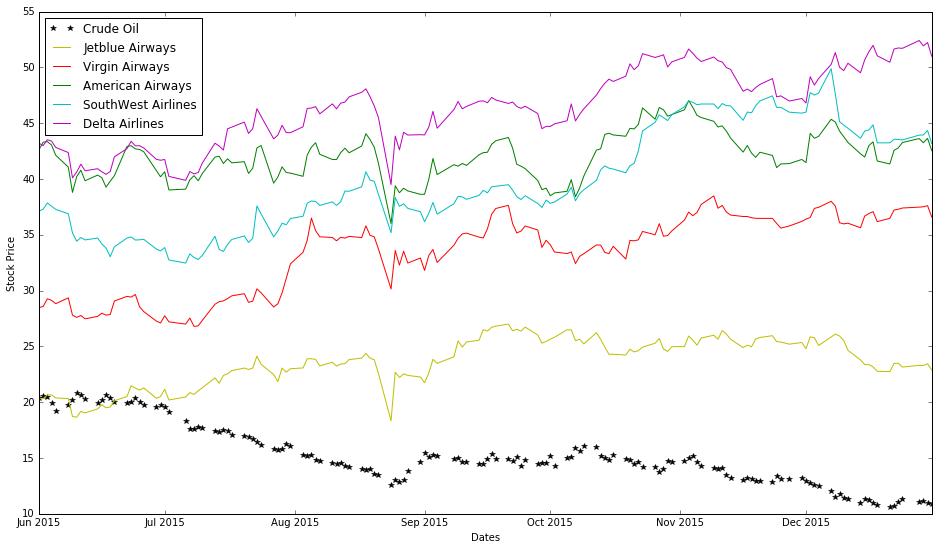

In [64]:
plt.figure(figsize=(16,9))


plt.plot (crude_oil["Open"], "k*",jblu["Open"], "y", va["Open"], "r", aal["Open"], "g", luv["Open"], "c", dal["Open"], "m")
plt.legend(["Crude Oil", "Jetblue Airways", "Virgin Airways", "American Airways", "SouthWest Airlines", "Delta Airlines"], loc='best')
plt.xlabel('Dates')
plt.ylabel('Stock Price')
plt.show()

** Conclusion **

Notice generally the trend shows that between June to mid August as oil prices decrease the airline stocks go up. Same is the case between September to January 16. We see that as oil slowly cheapens the airline stock tend to do better.

One possible exception is the case in late August. As the price of oil shifts down we see the airline stocks also move down. This can be another trajectory for further research.

### **2.  Relationship between different Sectored-Stocks Using Correlation Coefficients**

** Creating a New Dataset **


In [65]:
m_data = pd.io.data.get_data_yahoo(['JBLU', 'DAL', 'LUV', 'VA', 'AAL', 'TSLA', 'BEBE'], start=datetime(2015, 1, 5), end=datetime(2016,1,9))["Adj Close"]

m_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256 entries, 2015-01-05 to 2016-01-08
Data columns (total 7 columns):
AAL     256 non-null float64
BEBE    256 non-null float64
DAL     256 non-null float64
JBLU    256 non-null float64
LUV     256 non-null float64
TSLA    256 non-null float64
VA      256 non-null float64
dtypes: float64(7)
memory usage: 16.0 KB


In [66]:
m_data.tail()

,AAL,BEBE,DAL,JBLU,LUV,TSLA,VA
Date,,,,,,,
2016-01-04,40.798681,0.56,48.506156,21.879999,41.884981,223.410004,34.730000
2016-01-05,40.409743,0.55,48.416440,21.790001,42.384087,223.429993,35.189999
2016-01-06,41.117810,0.51,48.775303,21.850000,42.773389,219.039993,35.029999
2016-01-07,40.339933,0.48,46.851404,20.780001,41.875001,215.649994,33.400002
2016-01-08,40.260149,0.46,46.462638,20.280001,42.134534,211.000000,32.869999


**Getting rid of NAN values**

Here is how we get rid of any NAN values in our table. We use the **.ffill** method. *Click [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html) for more details.* 

In [67]:
nm_data = m_data.ffill()
nm_data.head()

,AAL,BEBE,DAL,JBLU,LUV,TSLA,VA
Date,,,,,,,
2015-01-05,53.275581,2.290443,47.744986,15.22,41.285772,210.089996,41.680000
2015-01-06,52.445004,2.220734,46.619484,14.97,40.115810,211.279999,41.009998
2015-01-07,52.415338,2.439820,46.372664,15.10,40.452918,210.949997,39.750000
2015-01-08,53.058048,2.479654,47.577146,14.88,41.523732,210.619995,41.060001
2015-01-09,51.436446,2.360152,46.283808,14.38,40.443005,206.660004,42.290001


Here is an interesting example of simple scatter plot I found online for Citigroup vs. Goldman Sachs returns.
[Here](https://www.linkedin.com/pulse/visualizing-financial-data-scatter-plot-matrix-approach-gohil) is a link to further reading

![Scatterpoints](https://media.licdn.com/mpr/mpr/shrinknp_800_800/AAEAAQAAAAAAAALiAAAAJDY5ZjQzNzEwLWRiNmMtNDdkNy05ODNmLWJmODZhNjg5OWExMQ.png)


** Computing Returns **

In [68]:
returns = nm_data.pct_change()

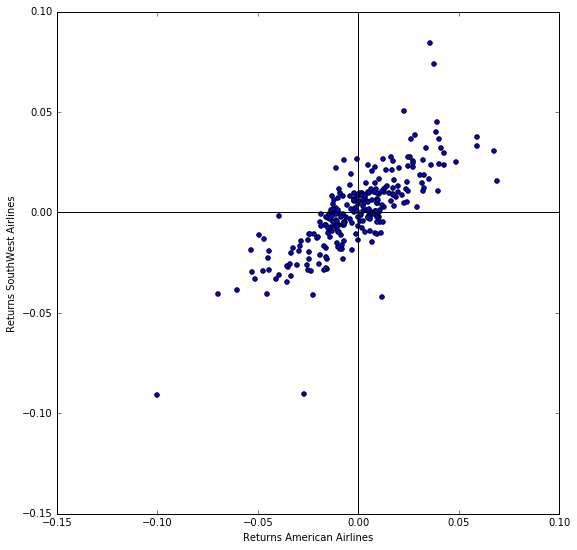

In [69]:
plt.figure(figsize = (9,9))

plt.scatter(returns.AAL, returns.LUV)
plt.xlabel('Returns American Airlines')
plt.ylabel('Returns SouthWest Airlines')
l1 = plt.axhline(y=0, color= "k")
l2 = plt.axvline(x=0, color= "k")
plt.show()

This studies the relationship between the returns of the two stocks.


** Correlation Coefficients **

In [70]:
c_coef = returns.corr()
c_coef

,AAL,BEBE,DAL,JBLU,LUV,TSLA,VA
AAL,1.000000,0.052896,0.842828,0.687367,0.788060,0.168679,0.545137
BEBE,0.052896,1.000000,0.076194,0.077143,0.079661,0.087039,0.039810
DAL,0.842828,0.076194,1.000000,0.713219,0.778381,0.190045,0.574329
JBLU,0.687367,0.077143,0.713219,1.000000,0.668995,0.227374,0.513742
LUV,0.788060,0.079661,0.778381,0.668995,1.000000,0.153630,0.552787
TSLA,0.168679,0.087039,0.190045,0.227374,0.153630,1.000000,0.191156
VA,0.545137,0.039810,0.574329,0.513742,0.552787,0.191156,1.000000


** Conclusion **


Lets look at BEBE which is a women's retail store and AAL which is an airline. Here the coefficient is only 0.05. Which means there is almost zero correlation between the price changes of the two. 

Notice this is not the case when we compare airline to airline, i.e. DAL (Delta Airlines) to AAL (American Airlines) - 0.84 - Very strong correlation!

### Further Reading 


There is also a Computational Finnance Course on Coursera.org.

They use a Python Open Source Library called QSTK (QuantSoftware ToolKit). They have a bunch of tutorials on the wiki page and one can always take the course.

For convenience I copied the description from the wiki page below:

QSToolKit (QSTK) is a Python-based open source software framework designed to support portfolio construction and management. We are building the QSToolKit primarily for finance students, computing students, and quantitative analysts with programming experience. You should not expect to use it as a desktop app trading platform. Instead, think of it as a software infrastructure to support a workflow of modeling, testing and trading.

Scroll through the Gallery to see the sorts of things you can do easily with QSTK.
If you are in a hurry, you can skip to the QSToolKit_Installation_Guide. 
Key components of QSTK are:

- Data: A data access package that enables fast reading of 
  historical data (qstkutil.DataAccess).
- Processing tools: Uses pandas, a Python package designed for time series 
  evaluation of equity data.
- Portfolio optimization: Using the CVXOPT library.
- Event studies: An efficient event analyzer, Event_Profiler.
- Simulation: A simple backtester, quicksim, 
  that includes transaction cost modeling.